In [12]:
# Dependencies
tetration_dl = os.environ.get('TETRATION_DL', os.getcwd())
sys.path.append(tetration_dl)
from sage_tetration import *

---
# Knoebel-H function

The Knoebel-H function has various names: the infinitely iterated exponential function, the infinite exponential, infinite hyperpower, tetrated to infinite heights, tetration to infinite heights, etc.

## Definition

For any complex number $x$, this function is defined as

$$H(x) := \lim_{n \to \infty} {}^{n}x$$

where the limit exists (see also [tetration notation](https://en.wikipedia.org/wiki/Tetration#Notation)), and where the limit does not exist, it is defined as 

$$H_k(x) = y \text{ where } y^{1/y} = x$$

for some branch $k$, which means that it can be expressed with the Lambert-W function as:

$$H_k(x) = \exp(-W_k(-\log(x))) = -\frac{W_k(-\log(x))}{\log(x)}$$

In [13]:
knoebel_h(exp(-e))

e^(-1)

In [14]:
knoebel_h(1/4)

1/2

In [15]:
knoebel_h(1)

1

In [16]:
knoebel_h(exp(1/e))

e

In [17]:
knoebel_h(sqrt(2))

2

In [18]:
knoebel_h(-1, sqrt(2))

4

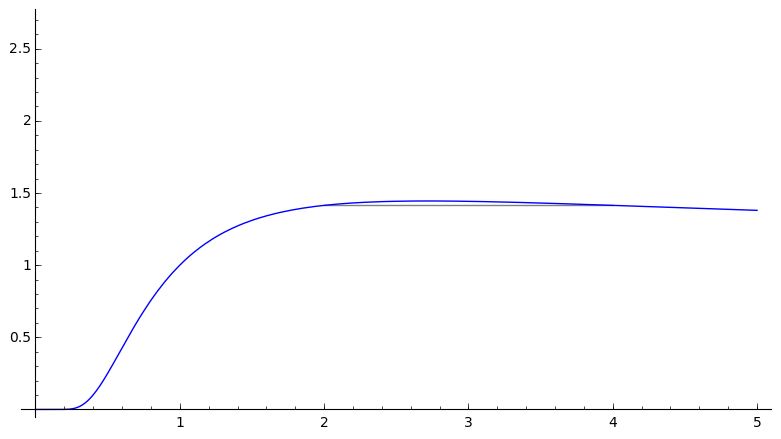

In [19]:
plot(lambda z: N(sqrt(2)), (2, 4), ymin=0, ymax=e, aspect_ratio=1, color=(0.5, 0.5, 0.5)) + \
    plot(lambda z: N(z^(1/z)), (0, 5), ymin=0, ymax=e, aspect_ratio=1)

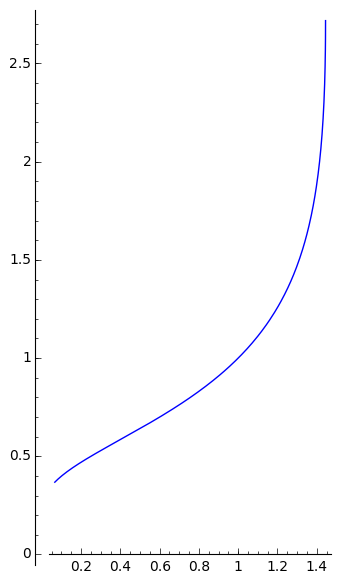

In [20]:
plot(lambda z: N(knoebel_h(z)), (exp(-e), exp(1/e)), ymin=0, ymax=e, aspect_ratio=1)

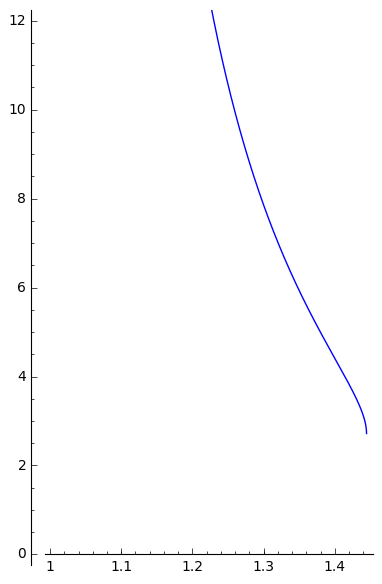

In [21]:
plot(lambda z: N(knoebel_h(-1, z)), (1, exp(1/e)), ymin=0, ymax=12, aspect_ratio=(1/16))

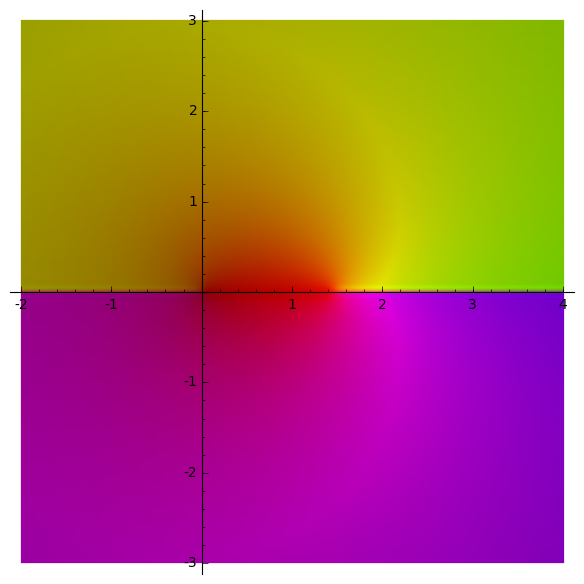

In [22]:
complex_plot(lambda z: N(knoebel_h(z)), (-2, 4), (-3, 3), aspect_ratio=1)

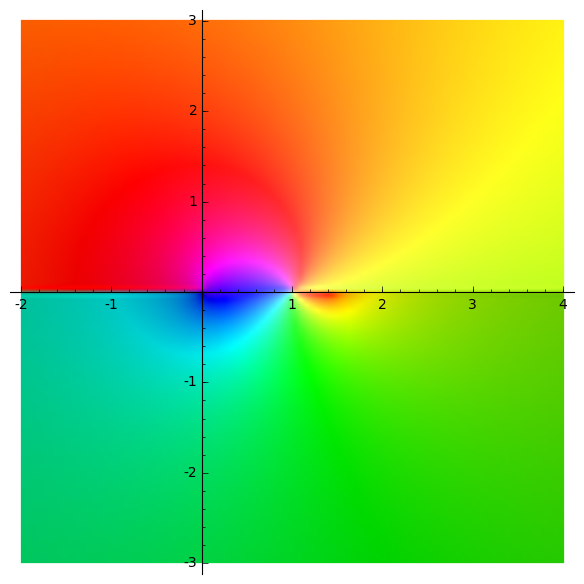

In [23]:
complex_plot(lambda z: N(knoebel_h(-1, z)), (-2, 4), (-3, 3), aspect_ratio=1)

In [24]:
show(knoebel_h(x))

knoebel_h(x)

In [25]:
show(diff(knoebel_h(x), x))

-knoebel_h(x)^2/((knoebel_h(x)*log(x) - 1)*x)

In [26]:
PS.<z> = PowerSeriesRing(QQ)

---
## Series of $H(\exp(x))$

The Knoebel-H function composed with $\exp(x)$ is the <abbr title="exponential generating function">[EGF](https://en.wikipedia.org/wiki/Generating_function#Exponential_generating_function)</abbr> of the sequence [A000272](http://oeis.org/A000272 "OEIS A000272"), the number of spanning trees in complete graph $K_n$ on $n$ labeled nodes.

$$H(\exp(x)) = \sum_{n = 0}^{\infty} \frac{x^n}{n!} A000272(n + 1)$$

In [27]:
show(taylor(knoebel_h(exp(x)), x, 0, 5))

54/5*x^5 + 125/24*x^4 + 8/3*x^3 + 3/2*x^2 + x + 1

In [28]:
show(knoebel_h.exp_series(z, order=5))

1 + z + 3/2*z^2 + 8/3*z^3 + 125/24*z^4 + 54/5*z^5 + O(z^6)

In [29]:
table([[n, knoebel_h.exp_series_coeff(n)] for n in range(10)])

,
,
,
,
,
,
,
,
,
,


---
## Series of $H(x + 1)$

The Knoebel-$H$ function at $1$ is the <abbr title="exponential generating function">[EGF](https://en.wikipedia.org/wiki/Generating_function#Exponential_generating_function)</abbr> of the sequence [A033917](http://oeis.org/A033917 "OEIS A033917").

$$H(x + 1) = \sum_{n = 0}^{\infty} \frac{x^n}{n!} A033917(n)$$

In [30]:
show(taylor(knoebel_h(x + 1), x, 0, 6))

283/40*x^6 + 4*x^5 + 7/3*x^4 + 3/2*x^3 + x^2 + x + 1

In [31]:
show(knoebel_h.at1_series(z, order=6))

1 + z + z^2 + 3/2*z^3 + 7/3*z^4 + 4*z^5 + 283/40*z^6 + O(z^7)

In [32]:
table([[n, knoebel_h.at1_series_coeff(n)] for n in range(10)])

,
,
,
,
,
,
,
,
,
,


In [33]:
N(knoebel_h(e))

0.318131505204764 - 1.33723570143069*I

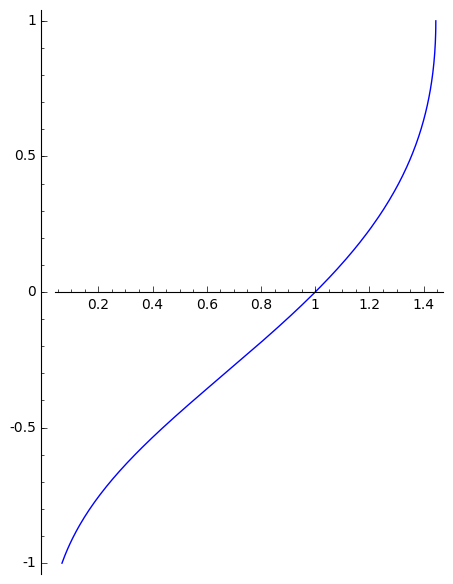

In [34]:
plot(lambda z: N(log(knoebel_h(z))), (exp(-e), exp(1/e)), ymin=-1, ymax=1, aspect_ratio=1)

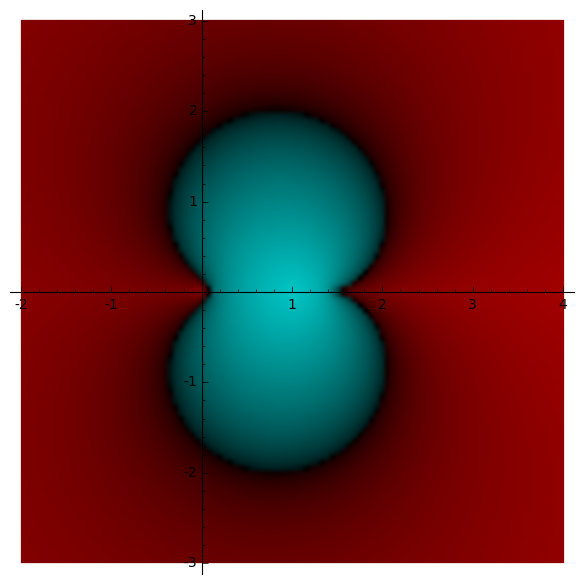

In [35]:
complex_plot(lambda z: N(abs(log(knoebel_h(z))) - 1), (-2, 4), (-3, 3), aspect_ratio=1)